In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

In [263]:
call55price = 2.875
put55price = 2.625
cur_underlying = 55
strike = 55


In [264]:
underlying = np.array([i for i in range(0, 115, 5)])
underlying

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110])

In [265]:
longcall = np.array([0 for i in underlying if i-strike<0]+[i-strike for i in underlying if i-strike>=0]) - call55price
shortcall = longcall*-1
longput = np.array([strike-i for i in underlying if strike-i>=0]+[0 for i in underlying if strike-i<0]) - put55price
shortput = longput*-1

In [266]:
payoff = pd.DataFrame({
    "underlying price": underlying,
    "long call": longcall,
    "short call": shortcall,
    "long put": longput,
    "short put": shortput
})

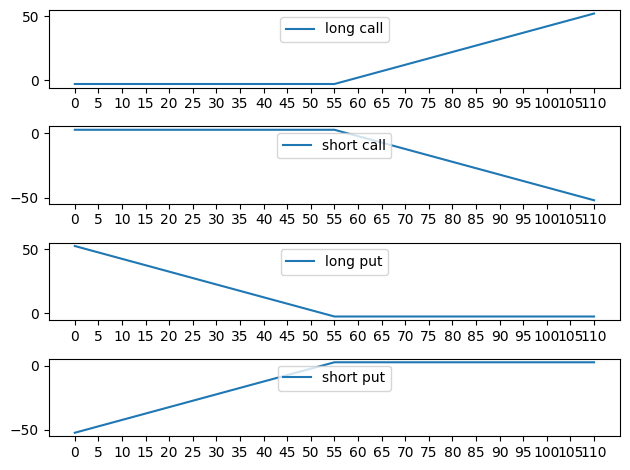

In [267]:
plt.subplot(411)
plt.plot(longcall, label="long call")
plt.legend(loc='upper center')
plt.xticks(range(len(underlying)), underlying)
plt.subplot(412)
plt.plot(shortcall, label="short call")
plt.legend(loc='upper center')
plt.xticks(range(len(underlying)), underlying)
plt.subplot(413)
plt.plot(longput, label="long put")
plt.legend(loc='upper center')
plt.xticks(range(len(underlying)), underlying)
plt.subplot(414)
plt.plot(shortput, label="short put")
plt.legend(loc='upper center')
plt.xticks(range(len(underlying)), underlying)
plt.tight_layout()
plt.show()

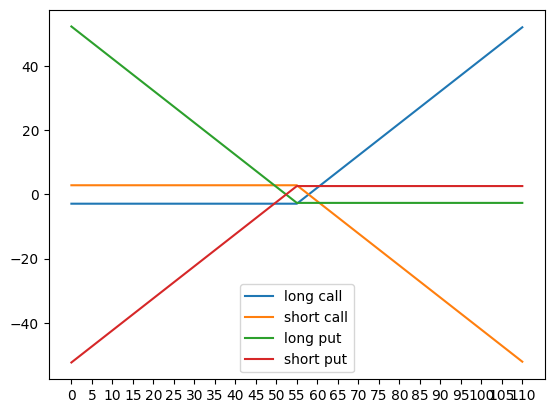

In [268]:
plt.plot(longcall, label="long call")
plt.plot(shortcall, label="short call")
plt.plot(longput, label="long put")
plt.plot(shortput, label="short put")
plt.legend()
plt.xticks(range(len(underlying)), underlying)
plt.show()

In [269]:
buyunderly = underlying - cur_underlying

In [270]:
payoff["buy underlying stock"] = buyunderly

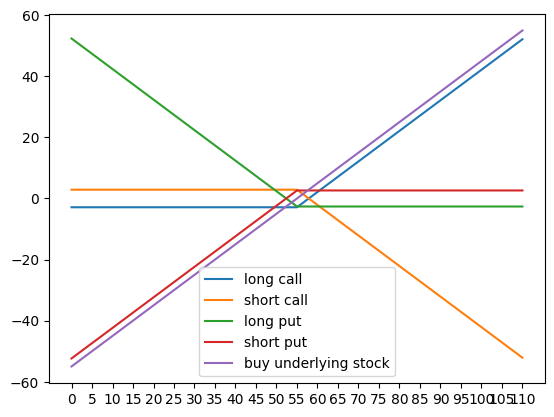

In [271]:
plt.plot(longcall, label="long call")
plt.plot(shortcall, label="short call")
plt.plot(longput, label="long put")
plt.plot(shortput, label="short put")
plt.plot(buyunderly, label="buy underlying stock")
plt.legend()
plt.xticks(range(len(underlying)), underlying)
plt.show()

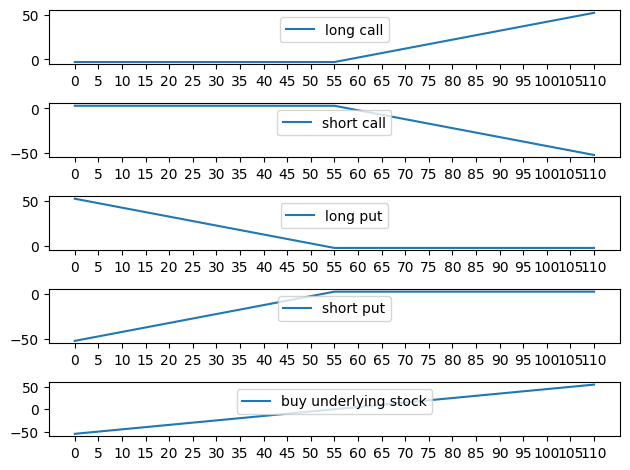

In [272]:
plt.subplot(511)
plt.plot(longcall, label="long call")
plt.xticks(range(len(underlying)), underlying)
plt.legend(loc='upper center')
plt.subplot(512)
plt.plot(shortcall, label="short call")
plt.xticks(range(len(underlying)), underlying)
plt.legend(loc='upper center')
plt.subplot(513)
plt.plot(longput, label="long put")
plt.xticks(range(len(underlying)), underlying)
plt.legend(loc='upper center')
plt.subplot(514)
plt.plot(shortput, label="short put")
plt.xticks(range(len(underlying)), underlying)
plt.legend(loc='upper center')
plt.subplot(515)
plt.plot(buyunderly, label="buy underlying stock")
plt.xticks(range(len(underlying)), underlying)
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [273]:
payoff

,underlying price,long call,short call,long put,short put,buy underlying stock
0,0,-2.875,2.875,52.375,-52.375,-55
1,5,-2.875,2.875,47.375,-47.375,-50
2,10,-2.875,2.875,42.375,-42.375,-45
3,15,-2.875,2.875,37.375,-37.375,-40
4,20,-2.875,2.875,32.375,-32.375,-35
5,25,-2.875,2.875,27.375,-27.375,-30
6,30,-2.875,2.875,22.375,-22.375,-25
7,35,-2.875,2.875,17.375,-17.375,-20
8,40,-2.875,2.875,12.375,-12.375,-15
9,45,-2.875,2.875,7.375,-7.375,-10


In [274]:
payoff.mean()

underlying price        55.000000
long call               11.472826
short call             -11.472826
long put                11.722826
short put              -11.722826
buy underlying stock     0.000000
dtype: float64

In [275]:
t=scipy.stats.t(df=len(buyunderly), loc=np.mean(buyunderly), scale=np.std(buyunderly)).pdf


In [276]:
t_weights = t(buyunderly)
t_weights

array([0.00306833, 0.00384064, 0.00472301, 0.00570051, 0.00674646,
       0.00782214, 0.00887801, 0.00985697, 0.01069921, 0.01134844,
       0.01175838, 0.01189857, 0.01175838, 0.01134844, 0.01069921,
       0.00985697, 0.00887801, 0.00782214, 0.00674646, 0.00570051,
       0.00472301, 0.00384064, 0.00306833])

In [277]:
t_weighted_payoff = payoff
for column in t_weighted_payoff.columns:
    t_weighted_payoff[column] = t_weighted_payoff[column]*t_weights

t_weighted_payoff

,underlying price,long call,short call,long put,short put,buy underlying stock
0,0.000000,-0.008821,0.008821,0.160704,-0.160704,-0.168758
1,0.019203,-0.011042,0.011042,0.181950,-0.181950,-0.192032
2,0.047230,-0.013579,0.013579,0.200138,-0.200138,-0.212535
3,0.085508,-0.016389,0.016389,0.213056,-0.213056,-0.228020
4,0.134929,-0.019396,0.019396,0.218417,-0.218417,-0.236126
5,0.195553,-0.022489,0.022489,0.214131,-0.214131,-0.234664
6,0.266340,-0.025524,0.025524,0.198646,-0.198646,-0.221950
7,0.344994,-0.028339,0.028339,0.171265,-0.171265,-0.197139
8,0.427969,-0.030760,0.030760,0.132403,-0.132403,-0.160488
9,0.510680,-0.032627,0.032627,0.083695,-0.083695,-0.113484


In [278]:
t_weighted_payoff.mean()

underlying price        4.323066e-01
long call               6.540173e-02
short call             -6.540173e-02
long put                6.736676e-02
short put              -6.736676e-02
buy underlying stock    6.033821e-18
dtype: float64

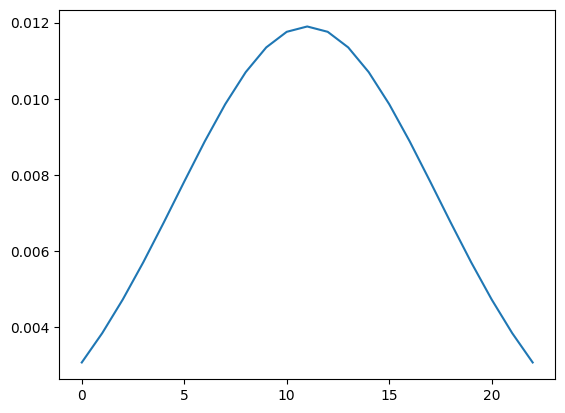

In [279]:
plt.plot(t(buyunderly))

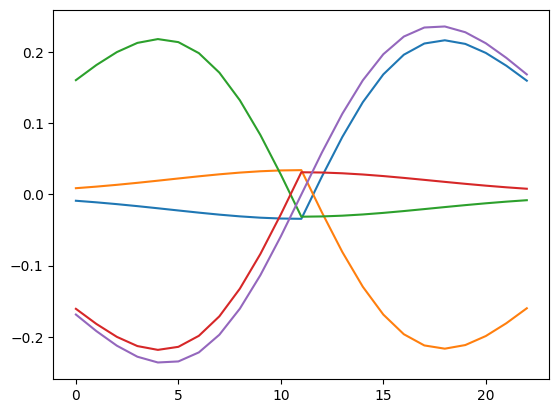

In [280]:
plt.plot(t_weighted_payoff[["long call","short call","long put","short put","buy underlying stock"]])


In [281]:
payoff["underlying price"]*t_weights

0     0.000000
1     0.000074
2     0.000223
3     0.000487
4     0.000910
5     0.001530
6     0.002365
7     0.003401
8     0.004579
9     0.005795
10    0.006913
11    0.007787
12    0.008296
13    0.008371
14    0.008013
15    0.007287
16    0.006306
17    0.005201
18    0.004096
19    0.003087
20    0.002231
21    0.001549
22    0.001036
Name: underlying price, dtype: float64

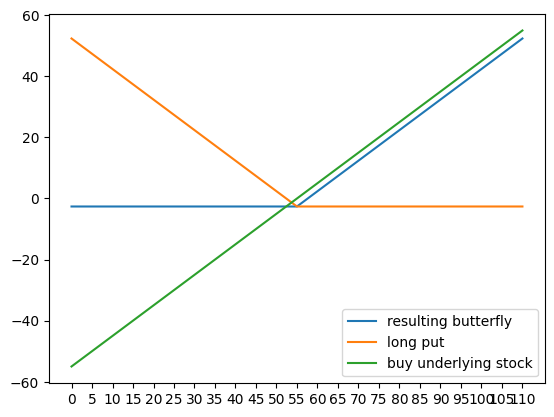

In [282]:
plt.plot(buyunderly+longput, label="resulting butterfly")
plt.plot(longput, label="long put")
plt.plot(buyunderly, label="buy underlying stock")
plt.legend()
plt.xticks(range(len(underlying)), underlying)
plt.show()

In [304]:
#####outline#####
#Q7 
###AT&T assuming that AT&T price will appreciate and downside risk is low
#1 buy underlying stock 
#2 buy underlying stock & call option (little but risk averse)
#3 buy call option 

### AT&T assuming low volatility: price is likely to be near current price at the time of expiration
#1 buy ITM call, sell ATM call*2, and buy OTM call

###LOTUS assuming high volatility
#1 buy put and call
#2 buy put and call (ITM to hedge center loss, but reduce tail profit)


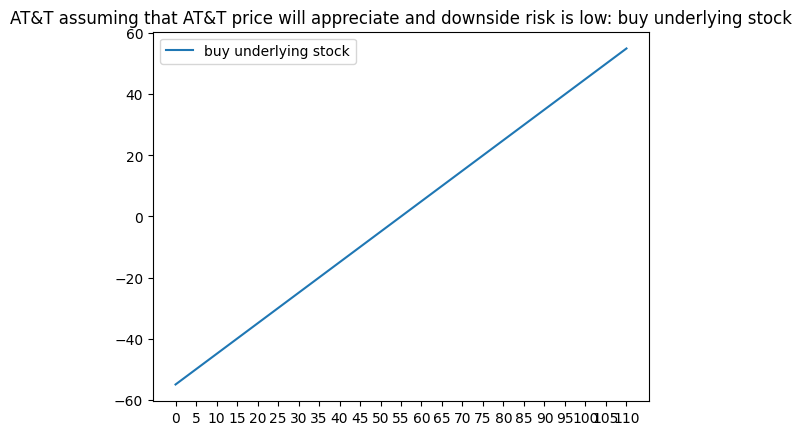

In [285]:
#Q7 
###AT&T assuming that AT&T price will appreciate and downside risk is low
#1 buy underlying stock 
plt.plot(buyunderly, label="buy underlying stock")
plt.legend()
plt.title("AT&T assuming that AT&T price will appreciate and downside risk is low: buy underlying stock")
plt.xticks(range(len(underlying)), underlying)
plt.show()

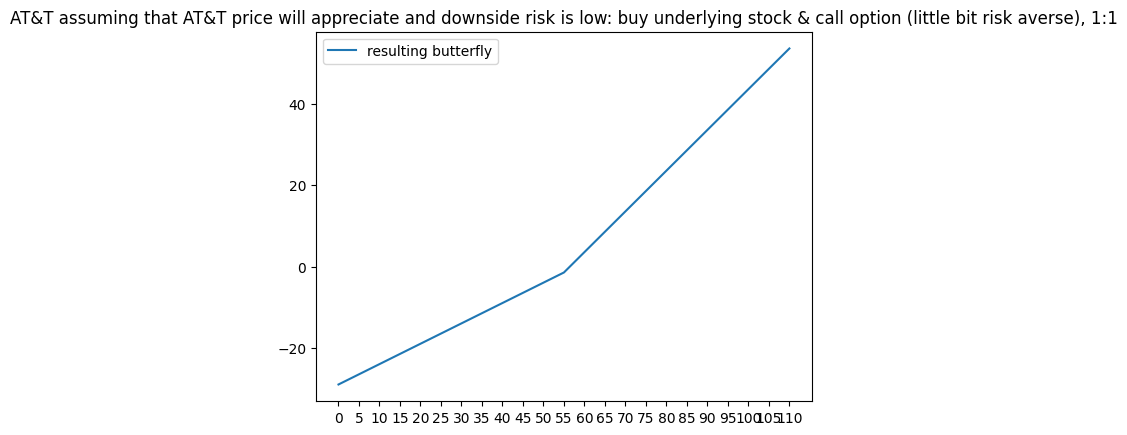

In [308]:
#Q7 
###AT&T assuming that AT&T price will appreciate and downside risk is low
#2 buy underlying stock & call option (little bit risk averse)
ATTa1s2 = (buyunderly + longcall)/2

plt.plot(ATTa1s2, label="resulting butterfly")
#plt.plot(longcall, label="long call")
#plt.plot(buyunderly, label="buy underlying stock")
plt.legend()
plt.title("AT&T assuming that AT&T price will appreciate and downside risk is low: buy underlying stock & call option (little bit risk averse), 1:1")
plt.xticks(range(len(underlying)), underlying)
plt.show()


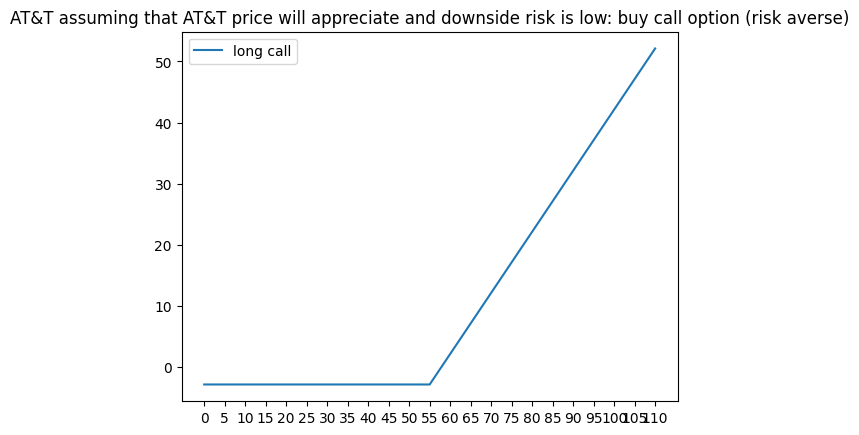

In [290]:
#Q7 
###AT&T assuming that AT&T price will appreciate and downside risk is low
#3 buy call option (risk averse)

plt.plot(longcall, label="long call")
plt.legend()
plt.title("AT&T assuming that AT&T price will appreciate and downside risk is low: buy call option (risk averse)")
plt.xticks(range(len(underlying)), underlying)
plt.show()


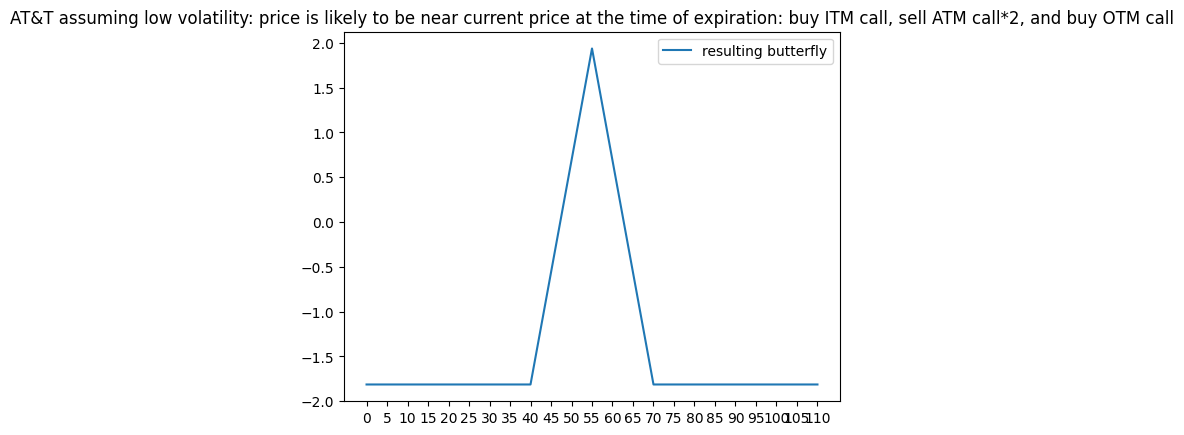

In [307]:
### AT&T assuming low volatility: price is likely to be near current price at the time of expiration
#1 buy OTM put and call (larger range, higher premium)

call70price = 1 #assume
call40price = 12 #assume
cur_underlying = 55
OTMcallstrike = 70
ITMcallstrike = 40

OTMlongcall = np.array([0 for i in underlying if i-OTMcallstrike<0]+[i-OTMcallstrike for i in underlying if i-OTMcallstrike>=0]) - call70price
ITMlongcall = np.array([0 for i in underlying if i-ITMcallstrike<0]+[i-ITMcallstrike for i in underlying if i-ITMcallstrike>=0]) - call40price

ATTa2s1 = (OTMlongcall + ITMlongcall + 2*shortcall)/4 #need to have underlying stock to exercise put option?
plt.plot(ATTa2s1, label="resulting butterfly")
#plt.plot(shortcall*2, label="2 at-the-money short call")
#plt.plot(OTMlongcall, label="out-of-the-money long call")
#plt.plot(ITMlongcall, label="in-the-money long call")
#plt.plot(buyunderly, label="buy underlying stock")
plt.legend()
plt.title("AT&T assuming low volatility: price is likely to be near current price at the time of expiration: buy ITM call, sell ATM call*2, and buy OTM call")
plt.xticks(range(len(underlying)), underlying)
plt.show()


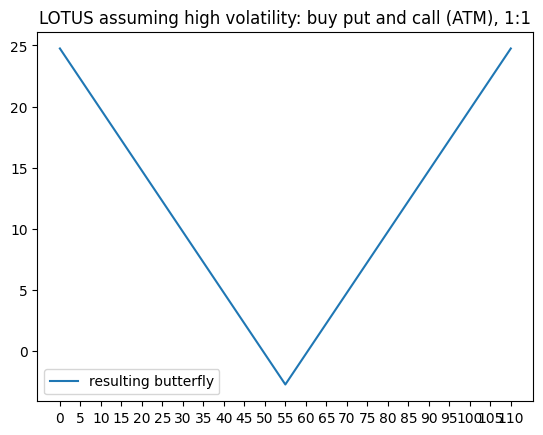

In [318]:
###LOTUS assuming high volatility
#1 buy put and call
LOTUSa1s1 = (longcall + longput)/2 #need to have underlying stock to exercise put option?

plt.plot(LOTUSa1s1, label="resulting butterfly")
plt.legend()
plt.title("LOTUS assuming high volatility: buy put and call (ATM), 1:1")
plt.xticks(range(len(underlying)), underlying)
plt.show()

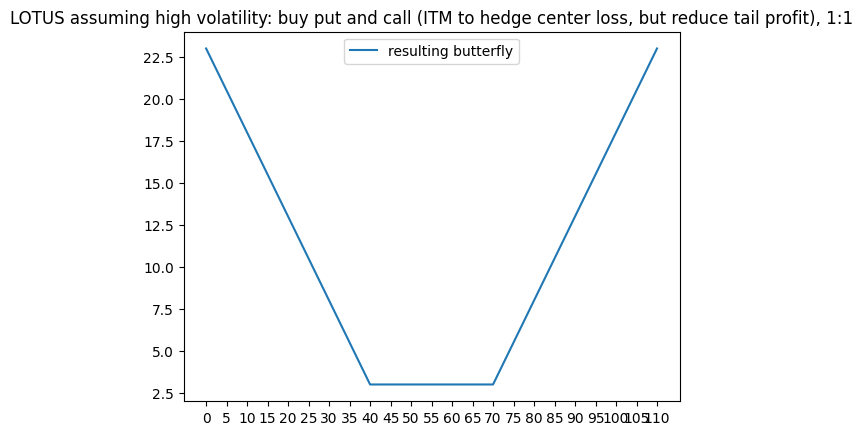

In [317]:
###LOTUS assuming high volatility
#2 buy put and call (ITM to hedge center loss, but reduce tail profit)

put70price = 12
ITMputstrike = 70 

ITMlongput = np.array([ITMputstrike-i for i in underlying if ITMputstrike-i>=0]+[0 for i in underlying if ITMputstrike-i<0]) - put70price

LOTUSa1s2 = (ITMlongput + ITMlongcall)/2

plt.plot(LOTUSa1s2, label="resulting butterfly")
plt.legend()
plt.title("LOTUS assuming high volatility: buy put and call (ITM to hedge center loss, but reduce tail profit), 1:1")
plt.xticks(range(len(underlying)), underlying)
plt.show()



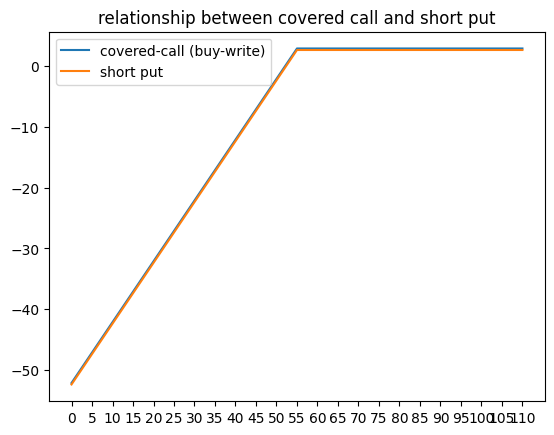

In [321]:
#Q4
buywrite = shortcall + buyunderly
plt.plot(buywrite, label="covered-call (buy-write)")
plt.plot(shortput, label="short put")
plt.legend()
plt.title("relationship between covered call and short put")
plt.xticks(range(len(underlying)), underlying)
plt.show()
